#IT1244 Project

In [ ]:
import pandas as pd
import numpy as np
import re
%pip install contractions
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

##Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path='/content/drive/My Drive/IT1244_Team1_Project/Model & Dataset/dataset.csv'
data_path_deduplicated='/content/drive/My Drive/IT1244_Team1_Project/Model & Dataset/removed_dups_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset for both duplicated and deduplicated datasets later on
columns=['label','tweet']
df_non_deduplicated=pd.read_csv(data_path,header=None,names=columns)
df_deduplicated=pd.read_csv(data_path_deduplicated)
df_deduplicated.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99095 entries, 0 to 99094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   99095 non-null  int64 
 1   tweet   99095 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
df_non_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   100000 non-null  int64 
 1   tweet   100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


##Data Preprocessing

In [ ]:
def data_cleaning(text):
    #expand contractions
    text=contractions.fix(text)
    #add negation prefix
    text=re.sub(r"\bnot\b","not_",text)
    #remove mentions and URLs
    text=re.sub(r"@[\w]*|https?://\S+","",text)
    #remove special characters and punctuations. keep only alphabets and hashtags
    text=re.sub(r"[^a-zA-Z#]"," ",text)
    #remove short words (length <=3)
    text=" ".join([w for w in text.split() if len(w) > 3])
    #convert to lowercase
    text=text.lower()
    #remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  #emoticons
                           u"\U0001F300-\U0001F5FF"  #symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  #transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  #flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r'',text)
    return text

In [ ]:
df_non_deduplicated["clean_tweet"]=df_non_deduplicated["tweet"].apply(data_cleaning)
df_deduplicated["clean_tweet"]=df_deduplicated["tweet"].apply(data_cleaning)

df_deduplicated.head()

,label,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda david carr third
1,0,is upset that he can't update his Facebook by ...,upset that cannot update facebook texting migh...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving here because cannot over there


In [ ]:
def tokenization_and_lemmatization(text):
    #tokenize the text
    tokens=word_tokenize(text.lower())
    #remove stop words
    filtered_tokens=[token for token in tokens if token not in stopwords.words('english')]
    #lemmatize each word
    lemmatizer=WordNetLemmatizer()
    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
    #combine words back into a single sentence
    cleaned_text=" ".join(lemmatized_tokens)
    return cleaned_text

In [ ]:
df_non_deduplicated["lemmatized_tweet"]=df_non_deduplicated["clean_tweet"].apply(tokenization_and_lemmatization)
df_deduplicated["lemmatized_tweet"]=df_deduplicated["clean_tweet"].apply(tokenization_and_lemmatization)

df_deduplicated.head()

,label,tweet,clean_tweet,lemmatized_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda david carr third,awww bummer shoulda david carr third
1,0,is upset that he can't update his Facebook by ...,upset that cannot update facebook texting migh...,upset update facebook texting might result sch...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds,dived many time ball managed save rest bound
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving here because cannot over there,behaving


##Check Tweet Length

###Cleaned Dataset

Outlier Analysis:
- Total tweets         : 100000
- Outliers detected    : 148
- Percentage outliers  : 0.15%


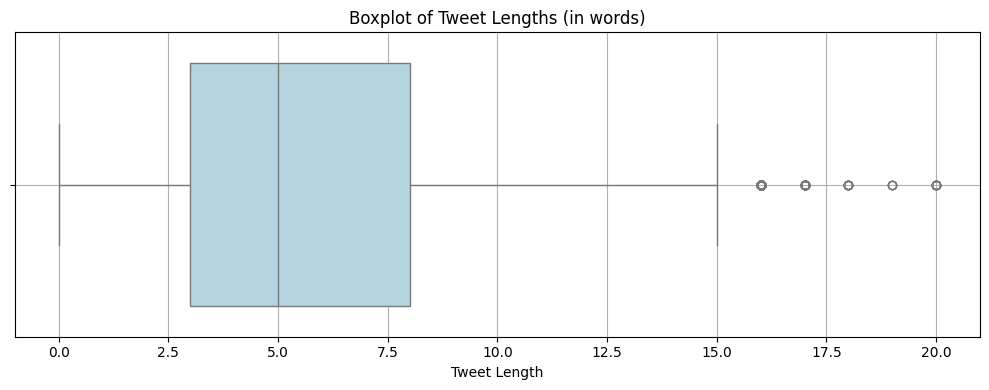

In [ ]:
# Compute tweet length (in words)
df_non_deduplicated['tweet_length'] = df_non_deduplicated['lemmatized_tweet'].apply(lambda x: len(x.split()))

# Calculate IQR
Q1 = df_non_deduplicated['tweet_length'].quantile(0.25)
Q3 = df_non_deduplicated['tweet_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_non_deduplicated[(df_non_deduplicated['tweet_length'] < lower_bound) | (df_non_deduplicated['tweet_length'] > upper_bound)]
num_outliers = outliers.shape[0]
total = df_non_deduplicated.shape[0]
percent_outliers = (num_outliers / total) * 100

# Print outlier stats
print(f"Outlier Analysis:")
print(f"- Total tweets         : {total}")
print(f"- Outliers detected    : {num_outliers}")
print(f"- Percentage outliers  : {percent_outliers:.2f}%")

# Plot boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_non_deduplicated['tweet_length'], color='lightblue')
plt.title("Boxplot of Tweet Lengths (in words)")
plt.xlabel("Tweet Length")
plt.grid(True)
plt.tight_layout()
plt.show()

###Cleaned & Deduplicated Datastet

Outlier Analysis:
- Total tweets         : 99095
- Outliers detected    : 148
- Percentage outliers  : 0.15%


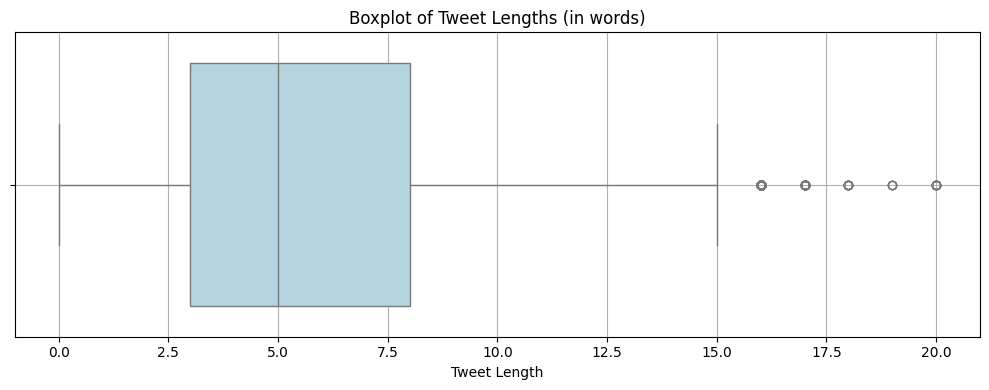

In [ ]:
# Compute tweet length (in words)
df_deduplicated['tweet_length'] = df_deduplicated['lemmatized_tweet'].apply(lambda x: len(x.split()))

# Calculate IQR
Q1 = df_deduplicated['tweet_length'].quantile(0.25)
Q3 = df_deduplicated['tweet_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_deduplicated[(df_deduplicated['tweet_length'] < lower_bound) | (df_deduplicated['tweet_length'] > upper_bound)]
num_outliers = outliers.shape[0]
total = df_deduplicated.shape[0]
percent_outliers = (num_outliers / total) * 100

# Print outlier stats
print(f"Outlier Analysis:")
print(f"- Total tweets         : {total}")
print(f"- Outliers detected    : {num_outliers}")
print(f"- Percentage outliers  : {percent_outliers:.2f}%")

# Plot boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_deduplicated['tweet_length'], color='lightblue')
plt.title("Boxplot of Tweet Lengths (in words)")
plt.xlabel("Tweet Length")
plt.grid(True)
plt.tight_layout()
plt.show()

##Removing Outliers

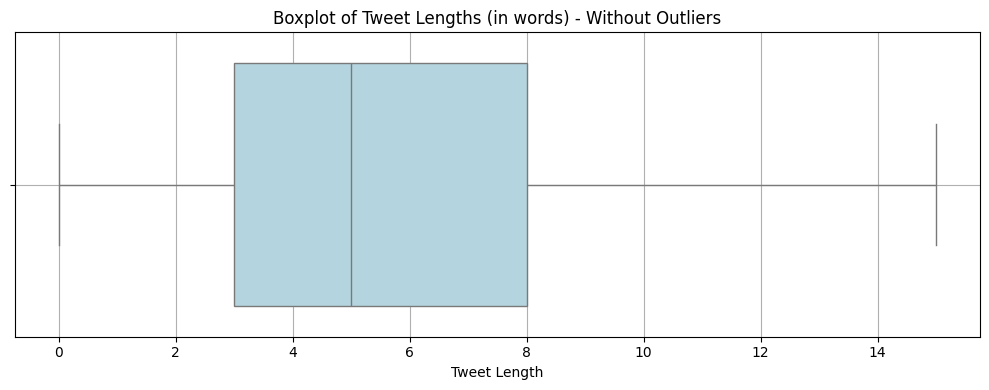

In [ ]:
df_non_deduplicated = df_non_deduplicated[(df_non_deduplicated['tweet_length'] >= lower_bound) & (df_non_deduplicated['tweet_length'] <= upper_bound)]

# Plot boxplot for the remaining data without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_non_deduplicated['tweet_length'], color='lightblue')
plt.title("Boxplot of Tweet Lengths (in words) - Without Outliers")
plt.xlabel("Tweet Length")
plt.grid(True)
plt.tight_layout()
plt.show()

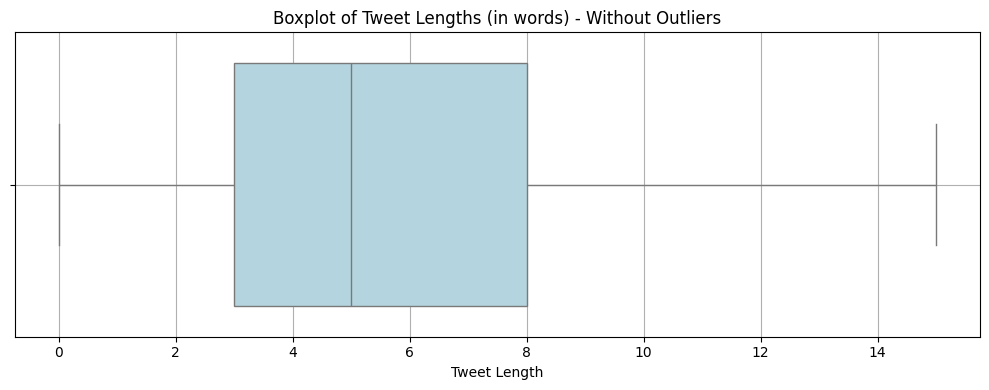

In [ ]:
df_deduplicated = df_deduplicated[(df_deduplicated['tweet_length'] >= lower_bound) & (df_deduplicated['tweet_length'] <= upper_bound)]

# Plot boxplot for the remaining data without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_deduplicated['tweet_length'], color='lightblue')
plt.title("Boxplot of Tweet Lengths (in words) - Without Outliers")
plt.xlabel("Tweet Length")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_deduplicated.head()

,label,tweet,clean_tweet,lemmatized_tweet,tweet_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda david carr third,awww bummer shoulda david carr third,6
1,0,is upset that he can't update his Facebook by ...,upset that cannot update facebook texting migh...,upset update facebook texting might result sch...,10
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds,dived many time ball managed save rest bound,8
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,6
4,0,"@nationwideclass no, it's not behaving at all....",behaving here because cannot over there,behaving,1


##Removing Empty Values

###Checking for Empty Values

In [ ]:
# Number of rows with missing or empty tweets in df_non_deduplicated
empty_tweets_non_deduplicated_count = df_non_deduplicated[df_non_deduplicated['lemmatized_tweet'].isna() | (df_non_deduplicated['lemmatized_tweet'].str.strip() == '')].shape[0]

# Number of rows with missing or empty tweets in df_deduplicated
empty_tweets_deduplicated_count = df_deduplicated[df_deduplicated['lemmatized_tweet'].isna() | (df_deduplicated['lemmatized_tweet'].str.strip() == '')].shape[0]

# Output the count of rows with empty or missing tweets
print("\nNumber of empty or missing tweets in df_non_deduplicated:", empty_tweets_non_deduplicated_count)
print("Number of empty or missing tweets in df_deduplicated:", empty_tweets_deduplicated_count)


Number of empty or missing tweets in df_non_deduplicated: 1171
Number of empty or missing tweets in df_deduplicated: 1164


In [ ]:
# Remove rows with missing or empty tweets in df_non_deduplicated
df_non_deduplicated = df_non_deduplicated[~df_non_deduplicated['lemmatized_tweet'].isna() & (df_non_deduplicated['lemmatized_tweet'].str.strip() != '')]

# Remove rows with missing or empty tweets in df_deduplicated
df_deduplicated = df_deduplicated[~df_deduplicated['lemmatized_tweet'].isna() & (df_deduplicated['lemmatized_tweet'].str.strip() != '')]

# Output the count of rows with valid tweets after cleaning
empty_tweets_non_deduplicated_count = df_non_deduplicated.shape[0]
empty_tweets_deduplicated_count = df_deduplicated.shape[0]

# Number of rows with missing or empty tweets in df_non_deduplicated
empty_tweets_non_deduplicated_count = df_non_deduplicated[df_non_deduplicated['lemmatized_tweet'].isna() | (df_non_deduplicated['lemmatized_tweet'].str.strip() == '')].shape[0]

# Number of rows with missing or empty tweets in df_deduplicated
empty_tweets_deduplicated_count = df_deduplicated[df_deduplicated['lemmatized_tweet'].isna() | (df_deduplicated['lemmatized_tweet'].str.strip() == '')].shape[0]

# Output the count of rows with empty or missing tweets
print("\nNumber of empty or missing tweets in df_non_deduplicated:", empty_tweets_non_deduplicated_count)
print("Number of empty or missing tweets in df_deduplicated:", empty_tweets_deduplicated_count)


Number of empty or missing tweets in df_non_deduplicated: 0
Number of empty or missing tweets in df_deduplicated: 0


##Handling Class Imbalance for Deduplicated Dataset

In [ ]:
df_deduplicated['label'].value_counts()

,count
label,
1,48967
0,48816


In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df_deduplicated[df_deduplicated['label'] == 0]
df_minority = df_deduplicated[df_deduplicated['label'] == 1]

# Oversample the minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,  # Sampling with replacement
                                   n_samples=len(df_majority),  # Equalize the number of samples
                                   random_state=42)

# Combine majority class with oversampled minority class
df_deduplicated = pd.concat([df_majority, df_minority_oversampled])

# Verify the new class distribution
print(df_deduplicated['label'].value_counts())

label
0    48816
1    48816
Name: count, dtype: int64


##Exporting Cleaned and Non-Deduplicated Dataset

In [ ]:
#save the cleaned and preprocessed dataset in a new CSV file for model trainings
cleaned_file_path='/content/drive/My Drive/IT1244_Team1_Project/Model & Dataset/ml_cleaned.csv'
df_non_deduplicated.to_csv(cleaned_file_path,index=False)

##Exporting Cleaned and Deduplicated Dataset

In [ ]:
#save the cleaned and preprocessed data set in a new CSV file for model trainings
cleaned_file_path='/content/drive/My Drive/IT1244_Team1_Project/Model & Dataset/ml_cleaned_deduplicated.csv'
df_deduplicated.to_csv(cleaned_file_path,index=False)